In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs


#https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"

dataDS = pd.read_csv(filename,skipinitialspace = True)
dataDsc = pd.read_csv(filename2, skipinitialspace = True)
dataPrecaution = pd.read_csv(filename3, skipinitialspace = True)
dataWeight = pd.read_csv(filename4, skipinitialspace = True)


UniqueDiseases = dataDS['Disease'].value_counts()
UniqueDiseases


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

# Vi skal have kombineret noget af mads' med det her, så vi f.eks har argument for valg af kun 6 symptomer (andet end med 17 symptomer ville det tage et døgn at udskifte værdier

Mængden af symptomer langs x-aksen
Vægtningen af symptomer op af y-aksen
Dieasese vil så være klassifikationen



In [2]:

#Symp = dataWeight['Symptom']
#Weight = dataWeight['weight']

#newData = dataDS[['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']]

#newData.replace(' ', '',regex=True,inplace=True)

#for i in range(len(newData)):
#    for n in range (len(newData.columns)):
#        for S in range (len(Symp)):
#            if newData.iat[i,n] == Symp[S]:
#                newData.iat[i,n] = Weight[S]
                
#newData       
    

In [3]:
#newData.iat[4917,3]

Den følgende kode, fremhæver hvor mange der er af hver disease case (120 af hver 41 sygdomme)

In [4]:
#UniqueDiseases = newData['Disease'].value_counts()
#UniqueDiseases

This code first creates a list of the unique labels, after that it creates a dictionary mapping from label value to a numeric value, and finally does a in place replacing of the label values with the numerical values.

SKAL have fundet ud af hvordan man tager det fra UniqueDiseases og knytter det til mappingen, så vi kan se hvad vi rent faktisk ender med at predict

In [5]:


#print(UniqueDiseases)

#labels = newData['Disease'].unique().tolist()
#mapping = dict( zip(labels,range(len(labels))) )
#newData.replace({'Disease': mapping},inplace=True)




In [6]:
#newData.to_csv('newData.csv')
newData = pd.read_csv('newData.csv', sep=",", index_col=0)
newData

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,0,1,3,4,6.0,NaN,NaN
1,0,3,4,6,NaN,NaN,NaN
2,0,1,4,6,NaN,NaN,NaN
3,0,1,3,6,NaN,NaN,NaN
4,0,1,3,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4915,36,5,3,5,6.0,4.0,4.0
4916,37,3,2,2,2.0,NaN,NaN
4917,38,6,4,5,6.0,NaN,NaN
4918,39,3,3,3,2.0,2.0,2.0


In [7]:
UniqueDiseases = newData['Disease'].value_counts()
UniqueDiseases

0     120
21    120
23    120
24    120
25    120
26    120
27    120
28    120
29    120
30    120
31    120
32    120
33    120
34    120
35    120
36    120
37    120
38    120
39    120
22    120
20    120
1     120
19    120
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
11    120
12    120
13    120
14    120
15    120
16    120
17    120
18    120
40    120
Name: Disease, dtype: int64

Skal nu have summeret hver række, resultat i 1 kolonne. Mængden af symptomer i en anden kolonne og Disease i tredje kolonne (som kommer fra newData). 

In [8]:
XSum = newData.sum(axis=1) #Sum of each row, 
ClassCol = newData['Disease']
YSum = (6-((newData.isnull().sum(axis=1))))*newData.max(axis=1) #How many symptoms

Values = [XSum, YSum, ClassCol]
headers = ["SumOfSymp", "CountOfSymp", "UniqueCode"]

CleanedData = pd.concat(Values, axis=1, keys=headers)

CleanedData

,SumOfSymp,CountOfSymp,UniqueCode
0,14.0,24.0,0
1,13.0,18.0,0
2,11.0,18.0,0
3,10.0,18.0,0
4,8.0,12.0,0
...,...,...,...
4915,63.0,216.0,36
4916,46.0,148.0,37
4917,59.0,152.0,38
4918,54.0,234.0,39


Nu vil jeg så prøve at plotte

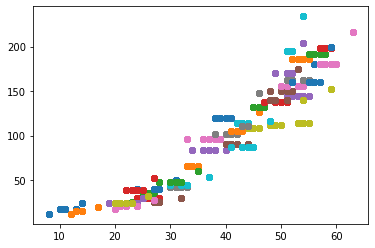

In [35]:
groups = CleanedData.groupby("UniqueCode")
for name, group in groups:
    plt.plot(group["SumOfSymp"], group["CountOfSymp"], marker="o", linestyle="", label=name)
#plt.legend()


#CleanedData.plot(kind='scatter', x='CountOfSymp', y = 'SumOfSymp')


Next step - Prøve kNN på selvlavet data/features mod newData data. Sammenlign score


In [13]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier


For linear modeller og andet komplekst, vil jeg her prøve at udvælge et par diseases. Herfra kan man så nemt lave hvad man vil med dem

In [41]:
FiveDis = newData[(newData['Disease']==6)|
                  (newData['Disease']==40)|
                  (newData['Disease']==0)|
                  (newData['Disease']==37)|
                  (newData['Disease']==19)]

FiveDis

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,0,1,3,4,6.0,NaN,NaN
1,0,3,4,6,NaN,NaN,NaN
2,0,1,4,6,NaN,NaN,NaN
3,0,1,3,6,NaN,NaN,NaN
4,0,1,3,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4879,0,1,3,4,6.0,NaN,NaN
4885,6,3,6,7,5.0,NaN,NaN
4898,19,3,5,3,4.0,5.0,4.0
4916,37,3,2,2,2.0,NaN,NaN


C:\Users\marti\AppData\Local\Temp/ipykernel_18976/3775785389.py:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)
No handles with labels found to put in legend.


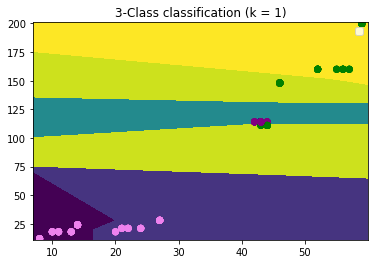

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1


XSum2 = FiveDis.sum(axis=1) #Sum of each row, 
ClassCol2 = FiveDis['Disease']
YSum2 = (6-((FiveDis.isnull().sum(axis=1))))*FiveDis.max(axis=1) #How many symptoms

Values = [XSum2, YSum2, ClassCol2]
headers = ["SumOfSymp", "CountOfSymp", "UniqueCode"]

CleanedData2 = pd.concat(Values, axis=1, keys=headers)


# import some data to play with

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = CleanedData2.iloc[:,0:2].values #OBS HER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Hvis vi får slice problem når der skal plottes
y = CleanedData2.iloc[:,2].values

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
cmap_test = ListedColormap(['violet', 'blue','purple','yellow','green'])
cmap_test2 = ListedColormap(['red','orange','blue','gold','k'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_test)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.legend()
plt.show()
